# Import Libs

In [98]:
import pandas as pd
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt
import seaborn as sns 
import pandas_ta as ta

import os

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

# Define the parameters for data collection

In [99]:
for ticker in tickers:
    print(f"Downloading data to {ticker}...")
    df = yf.download(ticker, start='2020-01-01', end='2025-08-19', progress=False)
    
    if not df.empty:
        df.reset_index(inplace=True)
        file_path = os.path.join(raw_data_path, f'{ticker.split(".")[0]}_raw.csv')
        df.to_csv(file_path, index=False)
        print(f"Data for {ticker} saved to: {file_path}")
    else:
        print(f"Error: Unable to download data for {ticker}.")

print("\nData collection complete.")

dfs = {}
tickers_no_suffix = ['PETR4', 'VALE3']

for ticker in tickers_no_suffix:
    file_path = f"{raw_data_path}/{ticker}_raw.csv"
    try:
        df = pd.read_csv(file_path, index_col='Date', parse_dates=True)
        # O .iloc[1:] agora remove a linha com o nome do ticker que o yfinance adicionou
        df = df.iloc[1:].astype('float64').copy() 
        dfs[ticker] = df
        
        print(f"\n{'=' * 50}")
        print(f"Quick Inspection for {ticker}")
        print(f"{'=' * 50}")

        print("\n### First 5 lines:")
        print(df.head())
        print("\n### DataFrame Information:")
        df.info()
        print("\n### Descriptive Statistics:")
        print(df.describe())
        print("\n### Missing Values:")
        print(df.isnull().sum())
        
        print("\n### Count of Unique Values (Top 5 columns):")
        for col in df.columns[:5]:
            print(f"- {col}: {df[col].nunique()} unique values")

    except FileNotFoundError:
        print(f"Error: File {file_path} not found. Please run the data collection step again.")


Data for PETR4.SA saved to: ../data/raw\PETR4_raw.csv
Data for VALE3.SA saved to: ../data/raw\VALE3_raw.csv

Data collection complete.

Quick Inspection for PETR4

### First 5 lines:
               Close      High       Low      Open      Volume
Date                                                          
2020-01-02  9.300815  9.300815  9.182661  9.243252  37774500.0
2020-01-03  9.225074  9.464410  9.225074  9.355345  71595600.0
2020-01-06  9.334140  9.373525  9.073596  9.219016  81844000.0
2020-01-07  9.297785  9.355346  9.231134  9.337169  32822000.0
2020-01-08  9.240223  9.322022  9.161454  9.297785  48215600.0

### DataFrame Information:
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1401 entries, 2020-01-02 to 2025-08-18
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Close   1401 non-null   float64
 1   High    1401 non-null   float64
 2   Low     1401 non-null   float64
 3   Open    1401 non-null   float64
 4

C:\Users\mathe\AppData\Local\Temp\ipykernel_1016\3468098335.py:3: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start='2020-01-01', end='2025-08-19', progress=False)
C:\Users\mathe\AppData\Local\Temp\ipykernel_1016\3468098335.py:3: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start='2020-01-01', end='2025-08-19', progress=False)


- Close: 1344 unique values
- High: 1400 unique values
- Low: 1401 unique values
- Open: 1401 unique values
- Volume: 1397 unique values


# Análise univariada

## 1. Série Temporal do Preço de Fechamento

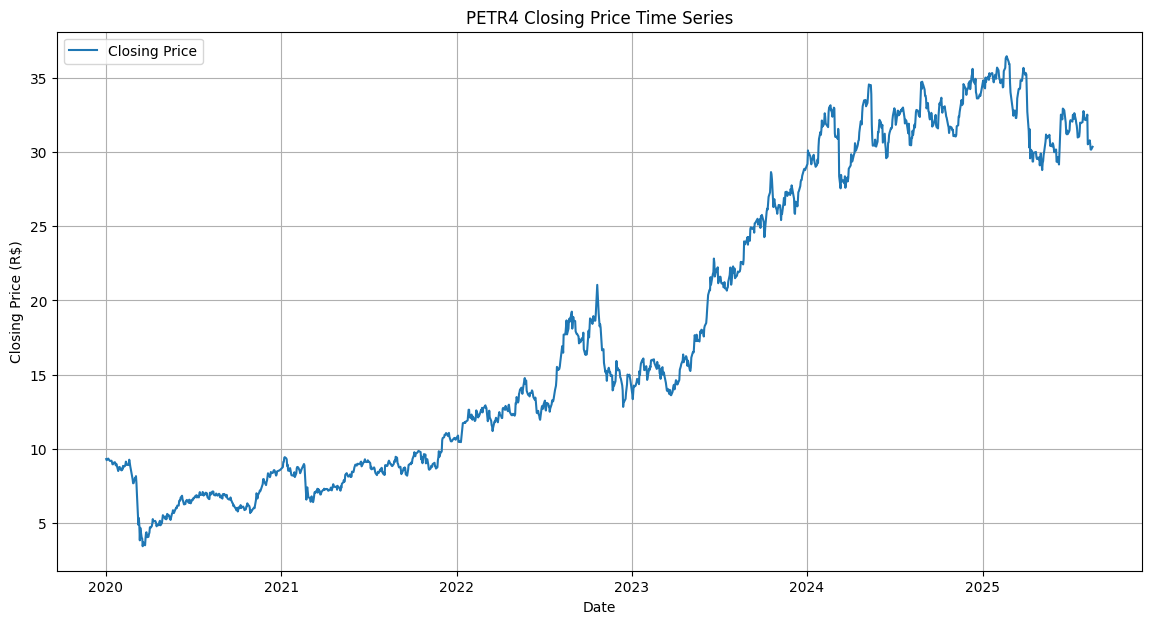

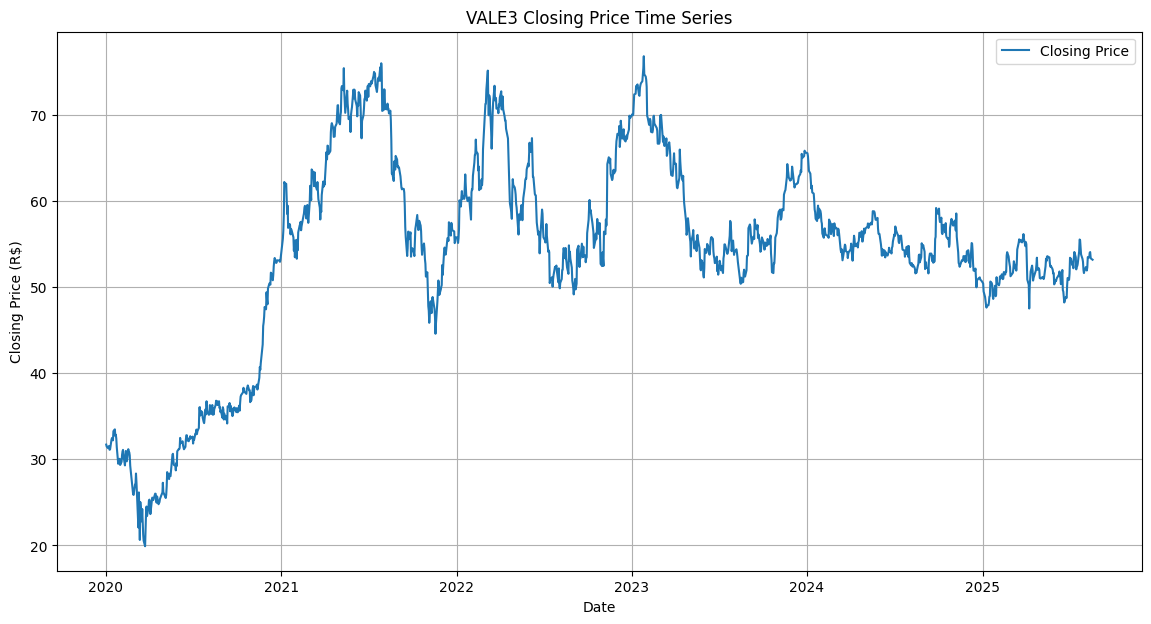

In [100]:
for ticker, df in dfs.items():
    plt.figure(figsize=(14, 7))
    plt.plot(df.index, df['Close'], label='Closing Price')
    plt.title(f'{ticker} Closing Price Time Series')
    plt.xlabel('Date')
    plt.ylabel('Closing Price (R$)')
    plt.legend()
    plt.grid(True)
    plt.show()

## 2. Histograma do Retorno Diário

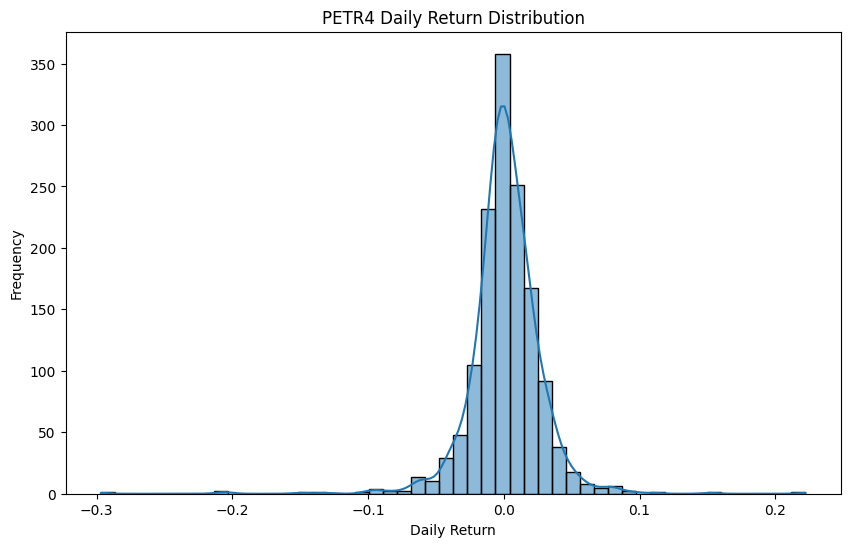

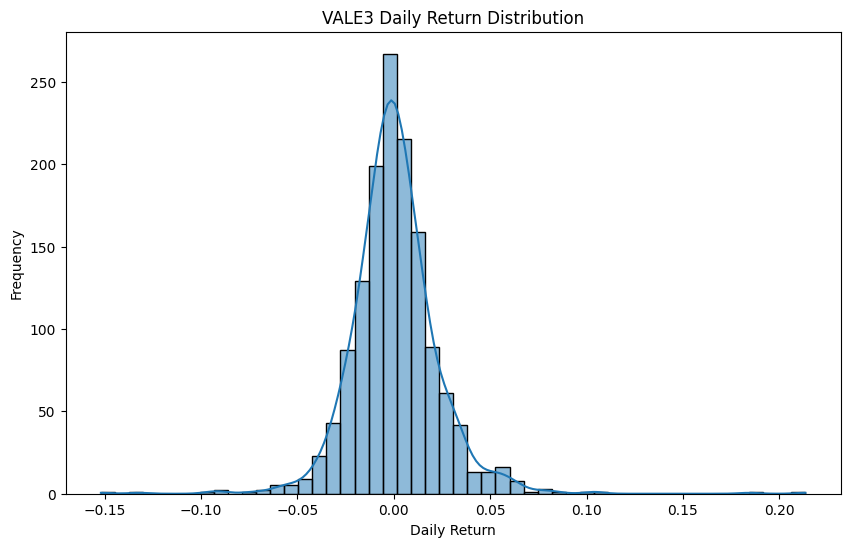

In [101]:
for ticker, df in dfs.items():
    # Cria a coluna de Retorno Diário (se ainda não existir)
    df['Daily_Return'] = df['Close'].pct_change()
    
    plt.figure(figsize=(10, 6))
    sns.histplot(df['Daily_Return'].dropna(), bins=50, kde=True)
    plt.title(f'{ticker} Daily Return Distribution')
    plt.xlabel('Daily Return')
    plt.ylabel('Frequency')
    plt.show()

## 3. Correlação de Retornos Diários (PETR4 vs. VALE3)

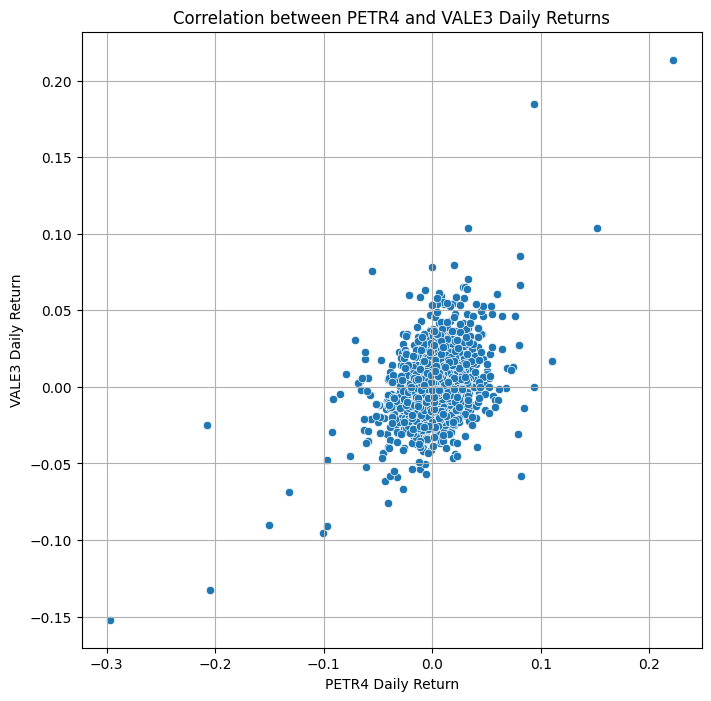

In [102]:
returns_df = pd.DataFrame({
    'PETR4_Return': dfs['PETR4']['Daily_Return'],
    'VALE3_Return': dfs['VALE3']['Daily_Return']
}).dropna()

plt.figure(figsize=(8, 8))
sns.scatterplot(x='PETR4_Return', y='VALE3_Return', data=returns_df)
plt.title('Correlation between PETR4 and VALE3 Daily Returns')
plt.xlabel('PETR4 Daily Return')
plt.ylabel('VALE3 Daily Return')
plt.grid(True)
plt.show()